

# **Exportação de Dados:**

O arquivo .csv deve conter, no mínimo, as seguintes colunas:

  *   Nome dos autores

  *   ID dos autores

  *   Título do artigo

  *   Ano de publicação




In [94]:
# prompt: Crie um dataframe do arquivo scopus.csv

import pandas as pd

# Substitua 'nome_do_arquivo.csv' pelo caminho do seu arquivo CSV
df = pd.read_csv('scopus.csv')

# Exibe as primeiras 5 linhas do DataFrame
print(df.head())


                                             Authors  \
0  Castro-Zaballa S.; González J.; Cavelli M.; Ma...   
1  de Souza I.D.; G. S. Fernandes V.; Vitor F. Ca...   
2  Olvera-Vargas H.; Trellu C.; Nidheesh P.V.; Mo...   
3  Santos N.C.; Almeida R.L.J.; Monteiro S.S.; de...   
4  Malcorra B.; Ribeiro M.; Jensen L.; Gomes G.; ...   

                                   Author full names  \
0  Castro-Zaballa, Santiago (56365518200); Gonzál...   
1  de Souza, Iara D. (57201700807); G. S. Fernand...   
2  Olvera-Vargas, Hugo (56078945300); Trellu, Clé...   
3  Santos, Newton Carlos (57218104648); Almeida, ...   
4  Malcorra, Bárbara (57194572682); Ribeiro, Mari...   

                                        Author(s) ID  \
0  56365518200; 57196033764; 55843131000; 5642582...   
1  57201700807; 59326173800; 59325469600; 6506664...   
2  56078945300; 57003373000; 44961482600; 5588360...   
3  57218104648; 57217715043; 57215822816; 5741784...   
4  57194572682; 57206648327; 58797255000; 5879

# **Criação da Rede de Co-Autoria:**

Utilizando os dados extraídos, criar uma rede de co-autoria. No grafo, os vértices serão os autores e as arestas representarão a colaboração entre eles.


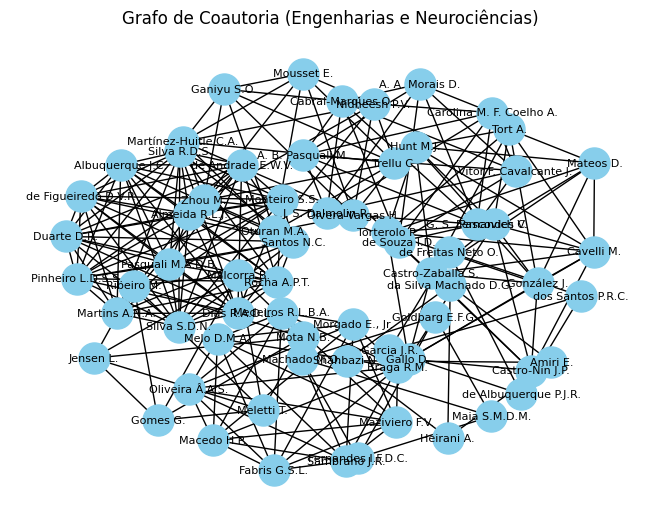

In [92]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Cria um grafo vazio
grafo_coautoria = nx.Graph()

# Itera pelas linhas do DataFrame
for index, row in df.iterrows():
  autores = row['Authors'].split(';')  # Supondo que a coluna 'Authors' contenha a lista de autores separada por ';'
  for i in range(len(autores)):
    for j in range(i + 1, len(autores)):
      autor1 = autores[i].strip()
      autor2 = autores[j].strip()
      if autor1 and autor2:  # Verifica se os nomes dos autores não estão vazios
        grafo_coautoria.add_edge(autor1, autor2)

# Define o layout do grafo
pos = nx.kamada_kawai_layout(grafo_coautoria)

# Desenha o grafo
nx.draw(grafo_coautoria, pos=pos, with_labels=True, node_color='skyblue',node_size=500, font_size=8)
plt.title('Grafo de Coautoria (Engenharias e Neurociências)')
plt.show()


# **Análises na Rede:**

Com a rede criada, vocês deverão realizar as seguintes análises utilizando o NetworkX (use as funções já implementadas na ferramenta)

*  **Densidade da Rede:**

  *  Calcular a densidade, que mede o quão conectados estão os autores em relação ao número máximo número máximo possível de conexões.
*     **Sub-Grafo:**
  *   Gerar um sub-grafo contendo apenas os vértices que possuem pelo menos X vizinhos. Calcular a densidade desse sub-grafo


*    **Histograma dos Graus:**
  *   Criar um gráfico de histograma mostrando a distribuição do grau dos vértices da rede. O grau de um vértice representa o número de co-autores com os quais ele colaborou







> Add blockquote



## **Densidade da Rede**

In [95]:
# Calcular a densidade da rede
densidade = nx.density(grafo_coautoria)

print(f"A densidade da rede  é: {densidade}")


A densidade da rede  é: 0.11533242876526459




#**Sub-Grafo**


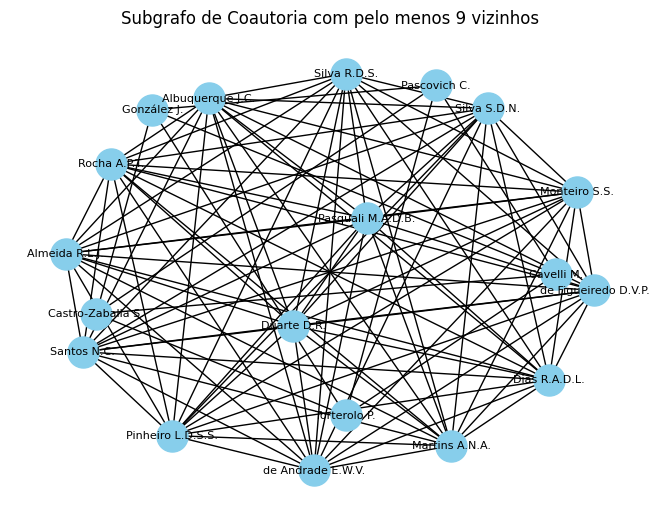

A densidade da rede do sub-grafo é: 0.5906432748538012


In [109]:
x= 9 # Defina o valor de x

# Encontrar os nós com pelo menos x vizinhos
nodes_to_keep = [node for node in grafo_coautoria.nodes() if grafo_coautoria.degree(node) >= x]

# Criar o subgrafo
subgrafo = grafo_coautoria.subgraph(nodes_to_keep)


# Define o layout do grafo
pos = nx.kamada_kawai_layout(subgrafo)

# Desenha o grafo
nx.draw(subgrafo, pos=pos, with_labels=True, node_color='skyblue', node_size=500, font_size=8)
plt.title("Subgrafo de Coautoria com pelo menos 9 vizinhos")
plt.show()

# Calcular a densidade da rede
densidade = nx.density(subgrafo)

print(f"A densidade da rede do sub-grafo é: {densidade}")



# **Histograma dos Graus**


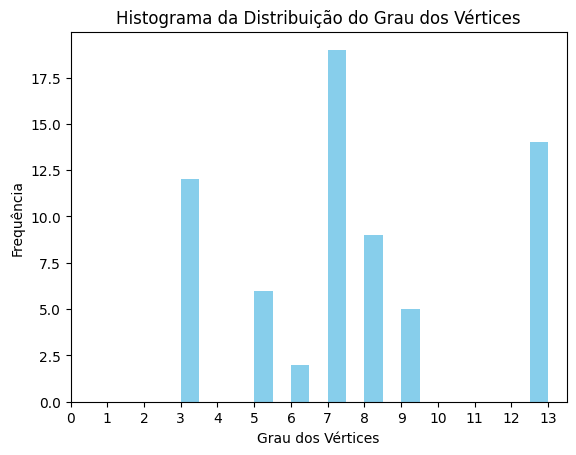

In [ ]:

import matplotlib.pyplot as plt


# Obter os graus dos vértices
graus = [d for n, d in grafo_coautoria.degree()]

# Criar o histograma
plt.hist(graus, bins=20, color='skyblue')  # Ajuste o número de bins conforme necessário
plt.xlabel('Grau dos Vértices')
plt.ylabel('Frequência')
plt.title('Histograma da Distribuição do Grau dos Vértices')
plt.xticks(range(max(graus) + 1))
plt.show()
